<a href="https://colab.research.google.com/github/tahminehladi/car_price_prediction/blob/main/Car_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [44]:
from google.colab import drive
drive.mount('/content/Mydrive')

Drive already mounted at /content/Mydrive; to attempt to forcibly remount, call drive.mount("/content/Mydrive", force_remount=True).


In [45]:
test_df=pd.read_csv('/content/Mydrive/MyDrive/TensorFlow_data/car_price_prediction_data/test.csv')
train_df=pd.read_csv('/content/Mydrive/MyDrive/TensorFlow_data/car_price_prediction_data/train.csv')
train_df.shape, test_df.shape

((188533, 13), (125690, 12))

In [46]:
train_df.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500


In [47]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            188533 non-null  int64 
 1   brand         188533 non-null  object
 2   model         188533 non-null  object
 3   model_year    188533 non-null  int64 
 4   milage        188533 non-null  int64 
 5   fuel_type     183450 non-null  object
 6   engine        188533 non-null  object
 7   transmission  188533 non-null  object
 8   ext_col       188533 non-null  object
 9   int_col       188533 non-null  object
 10  accident      186081 non-null  object
 11  clean_title   167114 non-null  object
 12  price         188533 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 18.7+ MB


In [48]:
train_df.isnull().sum()

,0
id,0
brand,0
model,0
model_year,0
milage,0
fuel_type,5083
engine,0
transmission,0
ext_col,0
int_col,0


## Handeling missing values

In [49]:
train_df['fuel_type'].value_counts()

,count
fuel_type,
Gasoline,165940
Hybrid,6832
E85 Flex Fuel,5406
Diesel,3955
–,781
Plug-In Hybrid,521
not supported,15


In [50]:
train_df['fuel_type'].isnull()

,fuel_type
0,False
1,False
2,False
3,False
4,False
...,...
188528,False
188529,False
188530,False
188531,False


In [51]:
# Gasoline is the most common feul_type, so I will fill the missing values in this column with Gasoline
train_df['fuel_type']=train_df['fuel_type'].fillna('Gasoline')
train_df['fuel_type'].isnull().sum()


0

In [52]:
train_df.isnull().sum()

,0
id,0
brand,0
model,0
model_year,0
milage,0
fuel_type,0
engine,0
transmission,0
ext_col,0
int_col,0


In [53]:
train_df.accident.value_counts()

,count
accident,
None reported,144514
At least 1 accident or damage reported,41567


In [54]:
train_df.clean_title.value_counts()

,count
clean_title,
Yes,167114


In [55]:
train_df.head(20)

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500
5,5,Audi,A6 2.0T Sport,2018,40950,Gasoline,252.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,A/T,White,–,None reported,Yes,29950
6,6,Audi,A8 L 3.0T,2016,62200,Gasoline,333.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,8-Speed A/T,Black,Black,None reported,Yes,28500
7,7,Chevrolet,Silverado 1500 1LZ,2016,102604,E85 Flex Fuel,355.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,White,Gray,None reported,Yes,12500
8,8,Ford,F-150 XLT,2020,38352,Gasoline,2.7L V6 24V PDI DOHC Twin Turbo,10-Speed Automatic,Snowflake White Pearl Metallic,Black,None reported,Yes,62890
9,9,BMW,M4 Base,2015,74850,Gasoline,425.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,Transmission w/Dual Shift Mode,Black,Blue,None reported,Yes,4000


In [56]:
train_df[train_df.accident.isnull() & train_df.clean_title.notnull()]

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
2060,2060,Lexus,GX 460 Base,2020,48210,Gasoline,4.6 Liter,Automatic,Nebula Gray Pearl,–,NaN,Yes,28825
15226,15226,Audi,A-Class A 220 4MATIC,2019,74725,Gasoline,2.0L I4 16V GDI DOHC,7-Speed Automatic with Auto-Shift,Black,Black,NaN,Yes,36995
68518,68518,Mazda,CX-9 Grand Touring,2021,49528,Gasoline,2.5L I4 16V GDI DOHC Turbo,6-Speed Automatic,Sonic Silver Metallic,Black,NaN,Yes,68495
73560,73560,Tesla,Model Y Long Range,2020,29850,Gasoline,425.0HP Electric Motor Electric Fuel System,A/T,Red,White,NaN,Yes,24980
79294,79294,Ford,Expedition Limited,2021,23842,Gasoline,3.5L V6 24V PDI DOHC Twin Turbo,10-Speed Automatic,Gray,Medium Stone,NaN,Yes,35113
86370,86370,Mercedes-Benz,E-Class E 350 4MATIC,2019,46150,Gasoline,2.0L I4 16V GDI DOHC Turbo,9-Speed Automatic,Black,Black,NaN,Yes,32324
97855,97855,INFINITI,QX80 Base,2014,99700,Gasoline,400.0HP 5.6L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,NaN,Yes,14500
118394,118394,Jeep,Grand Cherokee WK Laredo X,2021,16554,Gasoline,3.6L V6 24V MPFI DOHC,9-Speed Automatic,Velvet Red Pearlcoat,Global Black,NaN,Yes,53900
127862,127862,Chevrolet,Equinox Premier w/2LZ,2020,84224,Gasoline,2.0L I4 16V GDI DOHC Turbo,9-Speed Automatic,Sting Gray Clearcoat,Jet Black,NaN,Yes,33687
130831,130831,Chevrolet,Tahoe RST,2022,56247,Gasoline,5.3L V8 16V GDI OHV,10-Speed Automatic,Black,Jet Black,NaN,Yes,75499


In [57]:
train_df[(train_df.accident=='At least 1 accident or damage reported') & (train_df.clean_title.isnull())]

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
60,60,Mercedes-Benz,GLS 450 Base 4MATIC,2017,44147,Gasoline,3.0L V6 24V GDI DOHC Twin Turbo,9-Speed Automatic,White,Parchment.,At least 1 accident or damage reported,NaN,29999
122,122,Acura,TLX,2020,60854,Gasoline,2.0 Liter DOHC Turbo,Automatic,Platinum White Pearl,Ebony,At least 1 accident or damage reported,NaN,19425
256,256,BMW,840 Gran Coupe i xDrive,2020,29336,Gasoline,3.0 Liter Turbo,Automatic,Black Sapphire Metallic,Black,At least 1 accident or damage reported,NaN,50658
284,284,Subaru,Outback Limited XT,2020,39948,Gasoline,2.5L H4 16V MPFI DOHC,Automatic CVT,Magnetite Gray Metallic,Black,At least 1 accident or damage reported,NaN,24590
643,643,Toyota,Tundra Limited,2020,61494,Hybrid,3.4L V6 24V PDI DOHC Twin Turbo Hybrid,Automatic,Midnight Black Metallic,Black,At least 1 accident or damage reported,NaN,34084
...,...,...,...,...,...,...,...,...,...,...,...,...,...
187370,187370,Porsche,911 Turbo,2016,5409,Gasoline,3.8L H6 24V GDI DOHC Twin Turbo,6-Speed Manual,Gray,–,At least 1 accident or damage reported,NaN,82499
187396,187396,BMW,M5 Base,2018,47850,Gasoline,4.4L V8 32V GDI DOHC Twin Turbo,8-Speed Automatic,Black,Black,At least 1 accident or damage reported,NaN,26999
187812,187812,RAM,1500 Classic Warlock,2019,20296,E85 Flex Fuel,3.6L V6 24V MPFI DOHC Flexible Fuel,8-Speed Automatic,Diamond Black,Diesel Gray / Black,At least 1 accident or damage reported,NaN,32541
187851,187851,Toyota,4Runner Limited,2018,82260,Gasoline,4.0L V6 24V MPFI DOHC,5-Speed Automatic,Midnight Black Metallic,Sand Beige,At least 1 accident or damage reported,NaN,35998


In [58]:
train_df['accident']=train_df['accident'].fillna('None reported')

In [59]:
train_df['clean_title']=train_df.clean_title.fillna('No')

In [60]:
train_df.isnull().sum()

,0
id,0
brand,0
model,0
model_year,0
milage,0
fuel_type,0
engine,0
transmission,0
ext_col,0
int_col,0


## Exploratory Data Analysis (EDA)

<Axes: xlabel='model_year', ylabel='price'>

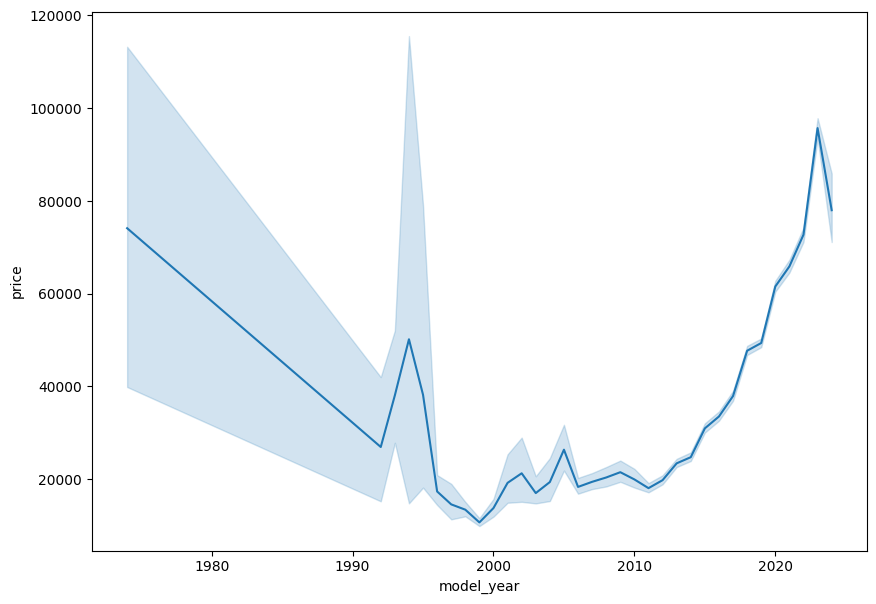

In [61]:
plt.figure(figsize=(10,7))

sns.lineplot(x='model_year',
             y='price',
             data=train_df)


<Axes: xlabel='model_year', ylabel='count'>

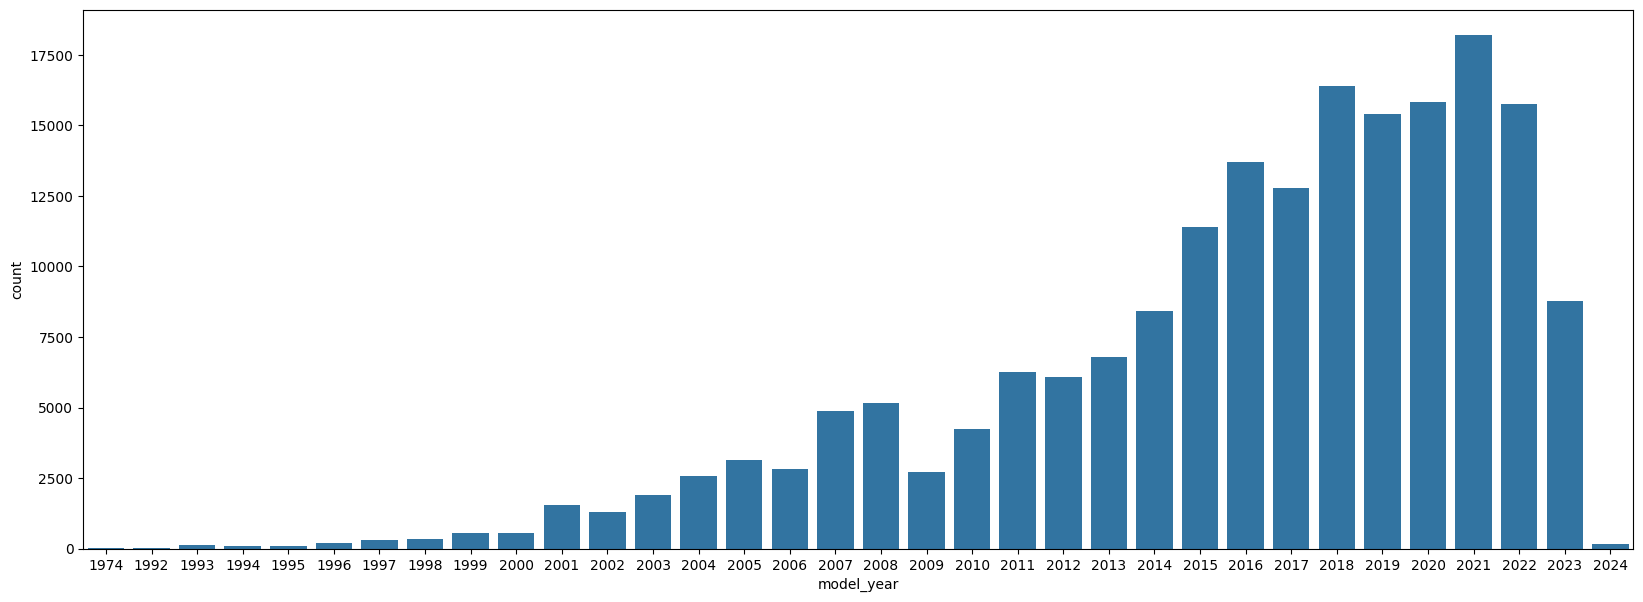

In [62]:
plt.figure(figsize=(20,7))
sns.countplot(data=train_df,
             x='model_year',
            )

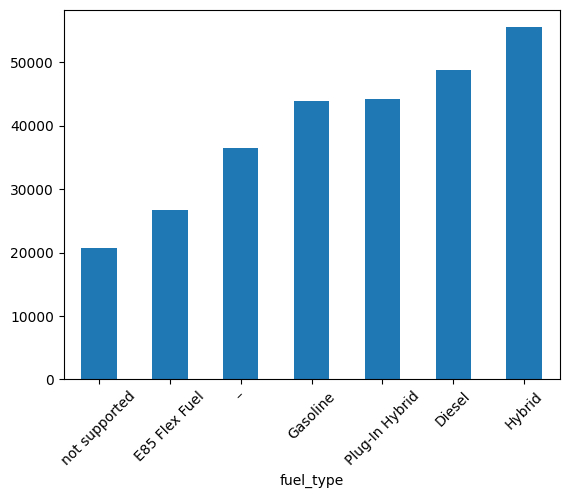

In [63]:
# Mean Price for Each Fuel Type
train_df.groupby(['fuel_type'])['price'].mean().sort_values().plot(kind='bar')
plt.xticks(rotation=45)
plt.show()

In [64]:
train_df.brand.value_counts().sort_values(ascending=False)

,count
brand,
Ford,23088
Mercedes-Benz,19172
BMW,17028
Chevrolet,16335
Audi,10887
Porsche,10612
Land,9525
Toyota,8850
Lexus,8643


<Axes: xlabel='brand'>

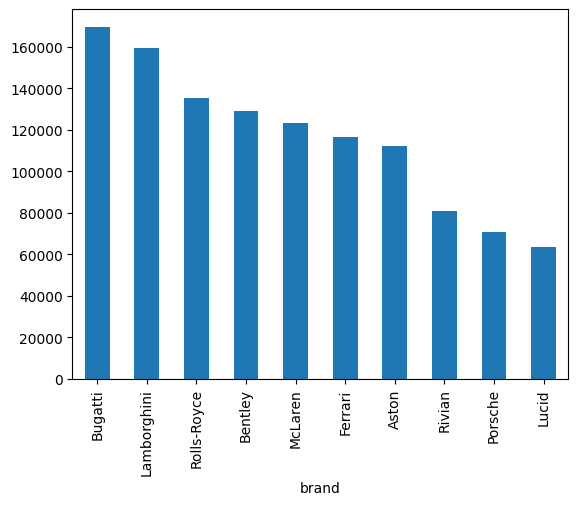

In [65]:
# Top 10 car brand based on their prices
train_df.groupby('brand')['price'].mean().sort_values(ascending=False).head(10).plot(kind='bar')

In [66]:
luxurious_brands = [
    'Bentley', 'Porsche', 'Rolls-Royce', 'Jaguar', 'Ferrari',
    'Lamborghini', 'Maserati', 'Bugatti', 'Aston', 'Maybach'
]

train_df['brand_type']=train_df.brand.apply(lambda x: 'luxury' if x in luxurious_brands else 'normal' )
train_df['brand_type'][:10]

,brand_type
0,normal
1,normal
2,normal
3,normal
4,normal
5,normal
6,normal
7,normal
8,normal
9,normal


In [67]:
train_df['brand_type'].value_counts()

,count
brand_type,
normal,172531
luxury,16002


Text(0.5, 1.0, 'Mean price of a car based on its brand type')

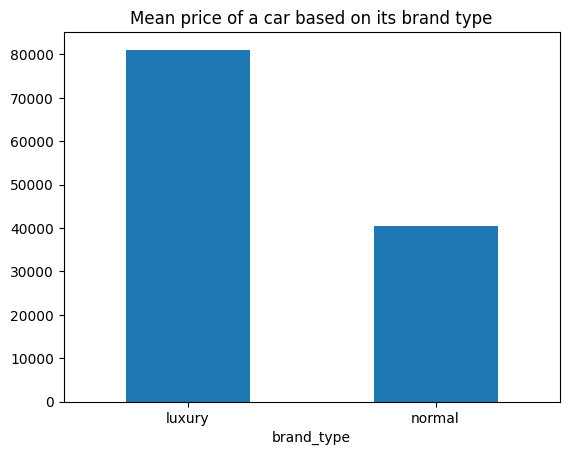

In [68]:
train_df.groupby(['brand_type'])['price'].mean().plot(kind='bar')
plt.xticks(rotation=0)
plt.title('Mean price of a car based on its brand type')

Text(0.5, 1.0, 'Mean price of a car based on its age group')

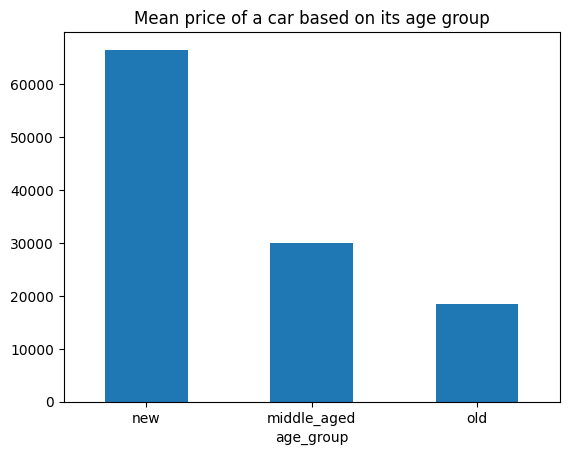

In [69]:
current_year=2024

train_df['car_age']=current_year-train_df.model_year

def categorize_car_age(car_age):
    if car_age <= 5:
        return 'new'
    elif 6 <= car_age <= 20:
        return 'middle_aged'
    else:
        return 'old'

train_df['age_group']=train_df.car_age.apply(categorize_car_age)

train_df.groupby(['age_group'])['price'].mean().sort_values(ascending=False).plot(kind='bar')
plt.xticks(rotation=360)
plt.title('Mean price of a car based on its age group')

Text(0.5, 1.0, 'Car Price Distribution')

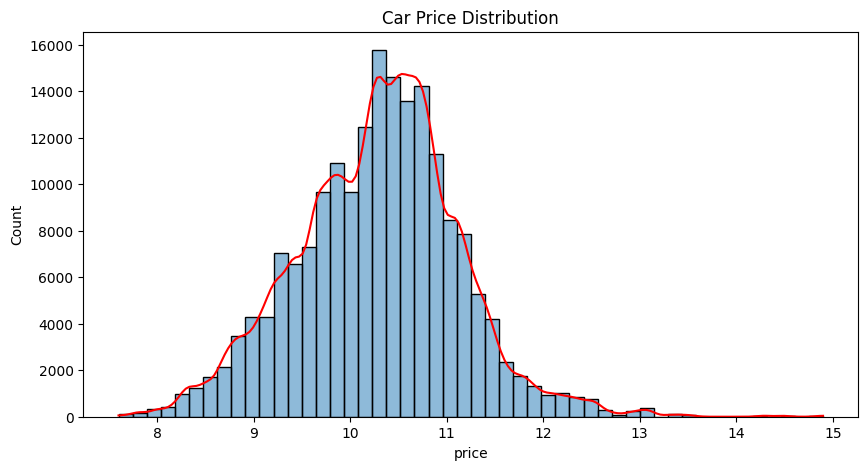

In [70]:
plt.figure(figsize=(10,5))
sns.histplot(data=train_df,
            x=np.log(train_df['price']),
            stat='count',
            bins=50,
            kde=True).lines[0].set_color('red')
plt.title('Car Price Distribution')

Text(0.5, 1.0, 'Top 10 color of cars')

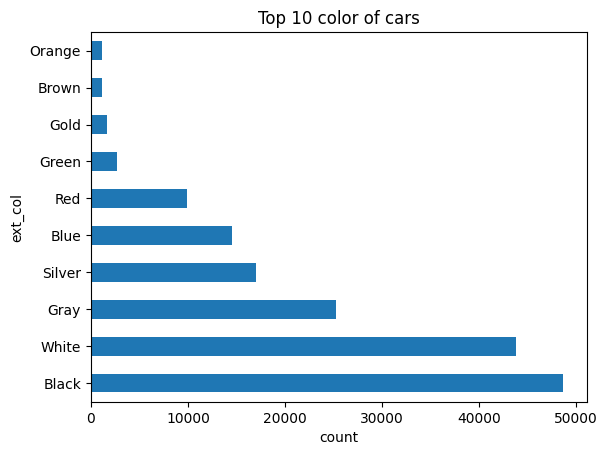

In [71]:
train_df.ext_col.value_counts().sort_values(ascending=False).head(10).plot(kind='barh')
plt.xlabel('count')
plt.title('Top 10 color of cars')

(array([0, 1]),
 [Text(0, 0, 'At least 1 accident or damage reported'),
  Text(1, 0, 'None reported')])

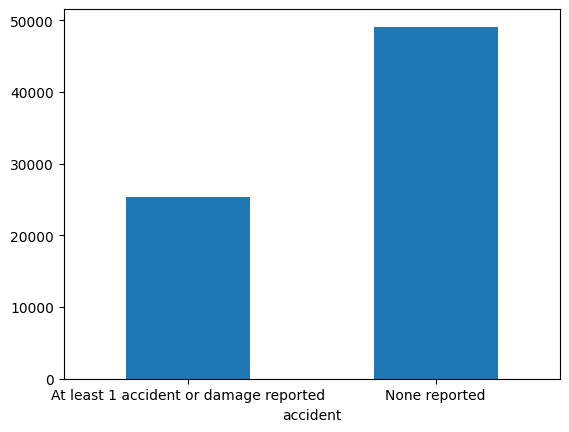

In [72]:
train_df.groupby(['accident'])['price'].mean().plot(kind='bar')
plt.xticks(rotation=360)

In [73]:
train_df.engine.head(20)

,engine
0,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel
1,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel
2,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...
3,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel
4,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel
5,252.0HP 2.0L 4 Cylinder Engine Gasoline Fuel
6,333.0HP 3.0L V6 Cylinder Engine Gasoline Fuel
7,355.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...
8,2.7L V6 24V PDI DOHC Twin Turbo
9,425.0HP 3.0L Straight 6 Cylinder Engine Gasoli...


In [74]:
import re
def extract_engine_size(engine_str):
    match=re.search(r'(\d+\.?\d*)\s*(L|Liter)', engine_str, re.IGNORECASE) # example: 1.6L
    if match:
        return float(match.group(1))
    return None

def extract_cylinder_count(engine_str):
    match_explicit= re.search(r'(\d+)\s*Cylinder', engine_str) # example: 4 Cylinder
    if match_explicit:
        return int(match_explicit.group(1))
    match_implicit=re.search(r'V(\d+)', engine_str) # example V6
    if match_implicit:
        return int(match_implicit.group(1))
    return None

train_df['engine_size']=train_df.engine.apply(extract_engine_size)
train_df['cylinder_count']=train_df.engine.apply(extract_cylinder_count)


In [75]:
train_df.engine_size.value_counts().sort_values(ascending=False)

,count
engine_size,
3.0,25958
2.0,23123
3.5,22148
4.0,11003
6.2,10868
...,...
1.2,26
8.0,20
8.4,18


In [76]:
train_df.engine_size.isnull().sum()

6698

In [77]:
train_df.engine_size.mode()[0]

3.0

In [78]:
# most common engine_size is 3, so, I will use 3 for NaNs
train_df['engine_size']=train_df['engine_size'].fillna(3)

In [79]:
train_df.engine_size.isnull().sum()

0

In [80]:
train_df.cylinder_count.isnull().sum()

21763

In [81]:
# I will use 0 to fill missing values in cylinder_count (which means no information)
train_df['cylinder_count']=train_df['cylinder_count'].fillna(0)

In [82]:
train_df.cylinder_count.isnull().sum()

0

In [83]:
train_df.transmission.unique()

array(['A/T', 'Transmission w/Dual Shift Mode', '7-Speed A/T',
       '8-Speed A/T', '10-Speed Automatic', '1-Speed A/T', '6-Speed A/T',
       '10-Speed A/T', '9-Speed A/T', '8-Speed Automatic',
       '9-Speed Automatic', '5-Speed A/T', 'Automatic',
       '7-Speed Automatic with Auto-Shift', 'CVT Transmission',
       '5-Speed M/T', 'M/T', '6-Speed M/T', '6-Speed Automatic',
       '4-Speed Automatic', '7-Speed M/T', '2-Speed A/T',
       '1-Speed Automatic', 'Automatic CVT', '4-Speed A/T',
       '6-Speed Manual', 'Transmission Overdrive Switch',
       '8-Speed Automatic with Auto-Shift', '7-Speed Manual',
       '7-Speed Automatic', '9-Speed Automatic with Auto-Shift',
       '6-Speed Automatic with Auto-Shift',
       '6-Speed Electronically Controlled Automatic with O', 'F', 'CVT-F',
       '8-Speed Manual', 'Manual', '–', '2', '6 Speed At/Mt',
       '5-Speed Automatic', '2-Speed Automatic', '8-SPEED A/T', '7-Speed',
       'Variable', 'Single-Speed Fixed Gear', '8-SPEED AT',


In [84]:
# categorize transmission into three groups (Automatic, Manual, other)
def categorize_transmission(trans_str):
    if pd.isna(trans_str):
        return 'other'
    elif 'M/T' in trans_str or 'Mt' in trans_str or 'Manual' in trans_str or 'MT' in trans_str:
        return 'manual'
    elif 'A/T' in trans_str or 'Automatic' in trans_str or 'AT' in trans_str or 'CVT' in trans_str:
        return 'automatic'
    else:
        return 'other'

train_df['transmission_type']=train_df['transmission'].apply(categorize_transmission)
train_df.transmission_type.value_counts()




,count
transmission_type,
automatic,152320
other,19798
manual,16415


<Axes: xlabel='transmission_type'>

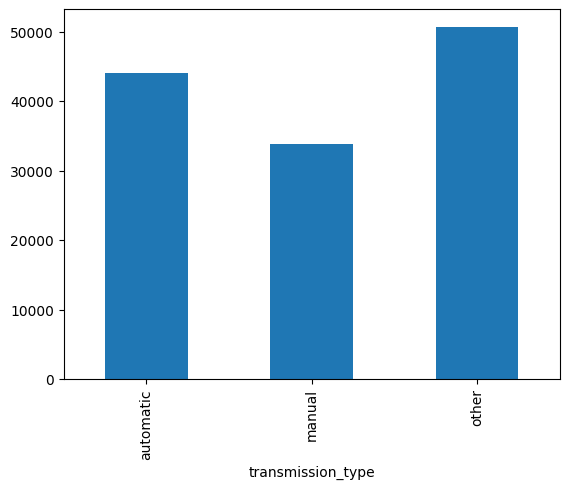

In [85]:
train_df.groupby(['transmission_type'])['price'].mean().plot(kind='bar')

In [86]:
train_df.car_age

,car_age
0,17
1,22
2,22
3,7
4,3
...,...
188528,7
188529,6
188530,3
188531,2


In [88]:
train_df['car_age']=train_df['car_age'].replace(0,1) # replace all 0 values in car_age to 1, to avoid infinity values
train_df['milage_per_year']=train_df['milage']/train_df['car_age']
train_df.milage_per_year.sort_values(ascending=False)

,milage_per_year
17645,235000.000000
158832,231500.000000
175361,227000.000000
177913,195000.000000
83862,180036.000000
...,...
45217,9.545455
119238,8.750000
24306,8.214286
141404,6.562500


In [89]:
train_df.columns

Index(['id', 'brand', 'model', 'model_year', 'milage', 'fuel_type', 'engine',
       'transmission', 'ext_col', 'int_col', 'accident', 'clean_title',
       'price', 'brand_type', 'car_age', 'age_group', 'engine_size',
       'cylinder_count', 'transmission_type', 'car_age2', 'milage_per_year'],
      dtype='object')

In [90]:
train_df_2=train_df.copy()

In [92]:
train_df_2.drop(['id', 'brand', 'model', 'model_year', 'engine', 'car_age2',
                 'transmission','ext_col', 'int_col', 'clean_title'], axis=1, inplace=True)
train_df_2.head()

,milage,fuel_type,accident,price,brand_type,car_age,age_group,engine_size,cylinder_count,transmission_type,milage_per_year
0,213000,Gasoline,None reported,4200,normal,17,middle_aged,1.6,4.0,automatic,12529.411765
1,143250,Gasoline,At least 1 accident or damage reported,4999,normal,22,old,3.9,8.0,automatic,6511.363636
2,136731,E85 Flex Fuel,None reported,13900,normal,22,old,5.3,8.0,automatic,6215.045455
3,19500,Gasoline,None reported,45000,normal,7,middle_aged,5.0,8.0,other,2785.714286
4,7388,Gasoline,None reported,97500,normal,3,new,2.0,4.0,automatic,2462.666667


In [94]:
num_features= [label for label, content in train_df_2.items() if pd.api.types.is_numeric_dtype(content)]
cat_features=[label for label, content in train_df_2.items() if not pd.api.types.is_numeric_dtype(content)]

print(num_features)

print(cat_features)

['milage', 'price', 'car_age', 'engine_size', 'cylinder_count', 'milage_per_year']
['fuel_type', 'accident', 'brand_type', 'age_group', 'transmission_type']


In [95]:
onehot_encoder_features = ['fuel_type', 'transmission_type', 'accident']
ordinal_encoder_features = ['brand_type', 'age_group']
standard_scalar_features = ['car_age', 'milage_per_year','milage', 'cylinder_count', 'engine_size']

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

# Add passthrough for untransformed columns
preprocessor = ColumnTransformer(
    transformers=[
        ('one_hot', OneHotEncoder(handle_unknown='ignore'), onehot_encoder_features),
        ('ordinal', OrdinalEncoder(), ordinal_encoder_features),
        ('num', MinMaxScaler(), standard_scalar_features)
    ]
)

In [97]:
## Split data in to train and valid

from sklearn.model_selection import train_test_split

X= train_df_2.drop('price', axis=1)
y=train_df_2['price']

X_train, X_valid, y_train, y_valid= train_test_split(X, y, test_size=0.2, random_state=42)

In [98]:
X_train.shape, X_valid.shape, y_valid.shape, y_train.shape

((150826, 10), (37707, 10), (37707,), (150826,))

In [99]:
y_train.dtype, y_valid.dtype

(dtype('int64'), dtype('int64'))

In [100]:
# Fit and transform the data
X_train_transformed = preprocessor.fit_transform(X_train)
X_valid_transformed = preprocessor.transform(X_valid)

In [101]:
# Extract column names
onehot_columns = preprocessor.named_transformers_['one_hot'].get_feature_names_out(onehot_encoder_features)
ordinal_columns = ordinal_encoder_features
num_columns = standard_scalar_features


# Combine all column names
all_columns = list(onehot_columns) + ordinal_columns + num_columns

# Create DataFrames
X_train_df = pd.DataFrame(X_train_transformed, columns=all_columns, index=X_train.index)
X_valid_df = pd.DataFrame(X_valid_transformed, columns=all_columns, index=X_valid.index)



In [102]:
X_train_df.shape, X_valid_df.shape, y_train.shape, y_valid.shape

((150826, 19), (37707, 19), (150826,), (37707,))

In [103]:
X_train_df

,fuel_type_Diesel,fuel_type_E85 Flex Fuel,fuel_type_Gasoline,fuel_type_Hybrid,fuel_type_Plug-In Hybrid,fuel_type_not supported,fuel_type_–,transmission_type_automatic,transmission_type_manual,transmission_type_other,accident_At least 1 accident or damage reported,accident_None reported,brand_type,age_group,car_age,milage_per_year,milage,cylinder_count,engine_size
184031,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.122449,0.037471,0.152075,0.333333,0.174194
173831,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,2.0,0.408163,0.037466,0.456656,0.500000,0.432258
183819,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.061224,0.097852,0.226970,0.500000,0.264516
85525,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.000000,0.023310,0.013295,0.333333,0.174194
41872,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.000000,0.021255,0.012102,0.666667,0.716129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.326531,0.022282,0.219822,0.666667,0.651613
103694,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.081633,0.048745,0.141269,0.500000,0.303226
131932,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.040816,0.044659,0.077550,0.500000,0.303226
146867,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.244898,0.060863,0.459126,0.500000,0.367742


In [139]:
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, mean_squared_error, accuracy_score

def evaluation_results(model,
                      X_train= X_train_df,
                      y_train=y_train,
                      X_valid=X_valid_df,
                      y_valid=y_valid):
    train_pred=model.predict(X_train)
    valid_pred=model.predict(X_valid)

    scores={
           'Valid RMSE': root_mean_squared_error(y_valid,
                                               valid_pred),
           'Valid MAE': mean_absolute_error(y_valid,
                                           valid_pred)
            }

    return scores


In [105]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


In [106]:
from tensorflow.keras.layers import Input, Dense, BatchNormalization, Dropout
from tensorflow.keras.models import Model
import tensorflow as tf

# Define the model
input=Input(shape=(X_train_df.shape[1],))
x=Dense(256, activation='relu')(input)
x=BatchNormalization()(x)
x=Dropout(0.3)(x)
x=Dense(128, activation='relu')(x)
x=Dense(64, activation='relu')(x)
x=Dense(32, activation='relu')(x)
output=Dense(1, activation='linear')(x)

ANN_model=Model(input, output)

# Compile the model
ANN_model.compile(loss='mse',
                    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                    metrics=[tf.keras.metrics.RootMeanSquaredError()])

# Fit the model
history = ANN_model.fit(X_train_df, y_train, validation_data=(X_valid_df, y_valid),
                          epochs=20, batch_size=32, callbacks=[early_stopping])


Epoch 1/20
4714/4714 ━━━━━━━━━━━━━━━━━━━━ 25s 5ms/step - loss: 5666312704.0000 - root_mean_squared_error: 74909.4062 - val_loss: 4793203712.0000 - val_root_mean_squared_error: 69232.9688
Epoch 2/20
4714/4714 ━━━━━━━━━━━━━━━━━━━━ 19s 4ms/step - loss: 5366078464.0000 - root_mean_squared_error: 73074.2344 - val_loss: 4788399616.0000 - val_root_mean_squared_error: 69198.2656
Epoch 3/20
4714/4714 ━━━━━━━━━━━━━━━━━━━━ 19s 4ms/step - loss: 5453979136.0000 - root_mean_squared_error: 73682.6719 - val_loss: 4772606464.0000 - val_root_mean_squared_error: 69084.0547
Epoch 4/20
4714/4714 ━━━━━━━━━━━━━━━━━━━━ 19s 4ms/step - loss: 4916984832.0000 - root_mean_squared_error: 69914.9844 - val_loss: 4735813632.0000 - val_root_mean_squared_error: 68817.2500
Epoch 5/20
4714/4714 ━━━━━━━━━━━━━━━━━━━━ 18s 4ms/step - loss: 5508193280.0000 - root_mean_squared_error: 74097.5391 - val_loss: 4738567680.0000 - val_root_mean_squared_error: 68837.2578
Epoch 6/20
4714/4714 ━━━━━━━━━━━━━━━━━━━━ 19s 4ms/step - loss: 55

In [140]:
ANN_model_scores=evaluation_results(model=ANN_model)
ANN_model_scores

4714/4714 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step
1179/1179 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


{'Valid RMSE': 68499.19295664894, 'Valid MAE': 19904.71440329071}

In [111]:
from xgboost import XGBRegressor

XGB_model = XGBRegressor()
XGB_model.fit(X_train_df, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [141]:
XGB_model_scores=evaluation_results(model=XGB_model)
XGB_model_scores

{'Valid RMSE': 71483.08223864734, 'Valid MAE': 20556.176807340387}

In [114]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np


xgb = XGBRegressor()

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 400, 500],
    'max_depth': [3, 5, 7, 9, 11],
    'learning_rate': [0.01, 0.05, 0.1, 0.3],
    'subsample': [0.6, 0.7, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4, 0.5],
    'reg_alpha': [0, 0.01, 0.1, 1, 10],
    'reg_lambda': [1, 1.5, 2, 3, 4],
    'min_child_weight': [1, 3, 5, 7],
}

# Define the RandomizedSearchCV
rs_XGB_model = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_grid,
    n_iter=10,
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit RandomizedSearchCV
rs_XGB_model.fit(X_train_df, y_train)

# Best parameters and best score
best_params = rs_XGB_model.best_params_
best_params


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.3, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0.1, reg_lambda=4, subsample=0.8; total time=   4.7s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.3, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0.1, reg_lambda=4, subsample=0.8; total time=   3.9s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.3, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0.1, reg_lambda=4, subsample=0.8; total time=   7.7s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.3, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0.1, reg_lambda=4, subsample=0.8; total time=   4.0s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.3, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0.1, reg_lambda=4, subsample=0.8; total time=   4.0s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max

{'subsample': 0.8,
 'reg_lambda': 4,
 'reg_alpha': 1,
 'n_estimators': 500,
 'min_child_weight': 7,
 'max_depth': 5,
 'learning_rate': 0.01,
 'gamma': 0.2,
 'colsample_bytree': 0.7}

In [142]:
rs_XGB_model_scores=evaluation_results(model=rs_XGB_model)
rs_XGB_model_scores

{'Valid RMSE': 68338.02865366968, 'Valid MAE': 19774.565764583665}

In [117]:
!pip install pytorch-tabnet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 2.1 MB/s eta 0:00:00


In [121]:
# Convert data to numpy arrays (TabNet works with numpy arrays)
X_train_array = np.array(X_train_df)
X_valid_array = np.array(X_valid_df)
y_train_array = np.array(y_train).reshape(-1, 1)  # Reshape to 2D
y_valid_array = np.array(y_valid).reshape(-1, 1)  # Reshape to 2D

import torch
from pytorch_tabnet.tab_model import TabNetRegressor

# define the TabNet model
tabnet_model=TabNetRegressor(
    n_d=64,  # Dimensionality of the decision prediction layer
    n_a=64,  # Dimensionality of the attention layer
    n_steps=3,  # Number of steps
    gamma=1.3,  # Relaxation coefficient for feature selection
    lambda_sparse=1e-5,  # L1 regularization for sparse features
    optimizer_fn=torch.optim.Adam,  # Adam optimizer
    optimizer_params=dict(lr=1e-2),  # Learning rate
    mask_type='sparsemax'  # Sparsemax for sparse attention weights

)

# train TabNet model
tabnet_model.fit(
    X_train_array, y_train_array,
    eval_set=[(X_valid_array, y_valid_array)],
    max_epochs=20,
    patience=10,
    batch_size=64,
    virtual_batch_size=64,
    num_workers=0,
    drop_last=False
)

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 6599229024.21089| val_0_mse: 4794300060.93658|  0:01:26s
epoch 1  | loss: 5630008783.91153| val_0_mse: 4773696782.70699|  0:02:53s
epoch 2  | loss: 5616436816.708| val_0_mse: 4729137811.15728|  0:04:19s
epoch 3  | loss: 5590115887.49526| val_0_mse: 4780727004.51723|  0:05:47s
epoch 4  | loss: 5592246950.13792| val_0_mse: 4761674786.69264|  0:07:14s
epoch 5  | loss: 5584215122.16558| val_0_mse: 4882579348.96784|  0:08:40s
epoch 6  | loss: 5583048593.78281| val_0_mse: 4762490205.01923|  0:10:08s
epoch 7  | loss: 5590680411.06121| val_0_mse: 4777221108.56938|  0:11:37s
epoch 8  | loss: 5581316184.26065| val_0_mse: 4785357393.91893|  0:13:05s
epoch 9  | loss: 5579230536.85323| val_0_mse: 4754830489.24791|  0:14:36s
epoch 10 | loss: 5577578823.98336| val_0_mse: 4765602399.85198|  0:16:04s
epoch 11 | loss: 5573353896.24686| val_0_mse: 4785414285.92672|  0:17:30s
epoch 12 | loss: 5572066635.35082| val_0_mse: 4773761347.30296|  0:19:00s

Early stopping occurred at epoch 12 wit

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


In [136]:

y_pred_tabnet_model = tabnet_model.predict(X_valid_array)

def evaluation_results_tabnet(model):

    scores={
           'Valid RMSE': root_mean_squared_error(y_valid_array,
                                               y_pred_tabnet_model),
           'Valid MAE': mean_absolute_error(y_valid_array,
                                           y_pred_tabnet_model)
            }

    return scores

tabnet_model_scores =evaluation_results_tabnet(model=tabnet_model)
tabnet_model_scores

{'Valid RMSE': 68768.72698514404, 'Valid MAE': 19915.580014958057}

In [137]:
# Define the model
input=Input(shape=(X_train_df.shape[1],))
x=Dense(32, activation='relu')(input)
x=BatchNormalization()(x)
x=Dropout(0.2)(x)
x=Dense(64, activation='relu')(x)
x=Dense(128, activation='relu')(x)
x=Dense(256, activation='relu')(x)
output=Dense(1, activation='linear')(x)

ANN_model_4=Model(input, output)

# Compile the model
ANN_model_4.compile(loss='mse',
                    optimizer='adam',
                    metrics=[tf.keras.metrics.RootMeanSquaredError()])

# Fit the model
history_4= ANN_model_4.fit(X_train_df, y_train, validation_data=(X_valid_df, y_valid),
                          epochs=20, batch_size=32)

Epoch 1/20
4714/4714 ━━━━━━━━━━━━━━━━━━━━ 42s 8ms/step - loss: 7040695296.0000 - root_mean_squared_error: 83344.0000 - val_loss: 4761503232.0000 - val_root_mean_squared_error: 69003.6484
Epoch 2/20
4714/4714 ━━━━━━━━━━━━━━━━━━━━ 31s 6ms/step - loss: 5358020608.0000 - root_mean_squared_error: 72975.5781 - val_loss: 4746367488.0000 - val_root_mean_squared_error: 68893.8828
Epoch 3/20
4714/4714 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - loss: 6154658816.0000 - root_mean_squared_error: 78291.9219 - val_loss: 4774892544.0000 - val_root_mean_squared_error: 69100.5938
Epoch 4/20
4714/4714 ━━━━━━━━━━━━━━━━━━━━ 40s 4ms/step - loss: 6133088768.0000 - root_mean_squared_error: 78074.6562 - val_loss: 4757634560.0000 - val_root_mean_squared_error: 68975.6094
Epoch 5/20
4714/4714 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - loss: 5572043776.0000 - root_mean_squared_error: 74335.8672 - val_loss: 4771971584.0000 - val_root_mean_squared_error: 69079.4609
Epoch 6/20
4714/4714 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - loss: 58

In [143]:
ANN_model_4_scores=evaluation_results(model=ANN_model_4)
ANN_model_4_scores

4714/4714 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step
1179/1179 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


{'Valid RMSE': 68596.46926686024, 'Valid MAE': 20938.817229582808}

In [144]:
rs_XGB_model_scores['Model_name'] = 'Tuned XGB Regressor'
ANN_model_4_scores['Model_name'] = 'ANN_Ascending order for Dense layers'
tabnet_model_scores['Model_name'] = 'TabNet model'
ANN_model_scores['Model_name'] = 'ANN_Descending order for Dense layers'
XGB_model_scores['Model_name']= 'XGB Regressor'


#Turn all model score dictionaries into a list
all_model_score=[rs_XGB_model_scores,
                 XGB_model_scores,
                 ANN_model_4_scores,
                 tabnet_model_scores,
                 ANN_model_scores]
# create DataFrame
model_comprison_df=pd.DataFrame(all_model_score).sort_values(by='Valid RMSE', ascending=False)
model_comprison_df

,Valid RMSE,Valid MAE,Model_name
1,71483.082239,20556.176807,XGB Regressor
3,68768.726985,19915.580015,TabNet model
2,68596.469267,20938.817230,ANN_Ascending order for Dense layers
4,68499.192957,19904.714403,ANN_Descending order for Dense layers
0,68338.028654,19774.565765,Tuned XGB Regressor


In [145]:
# mean RMSE score of all models
means_rmse=model_comprison_df['Valid RMSE'].mean()
means_rmse

69137.10002019405

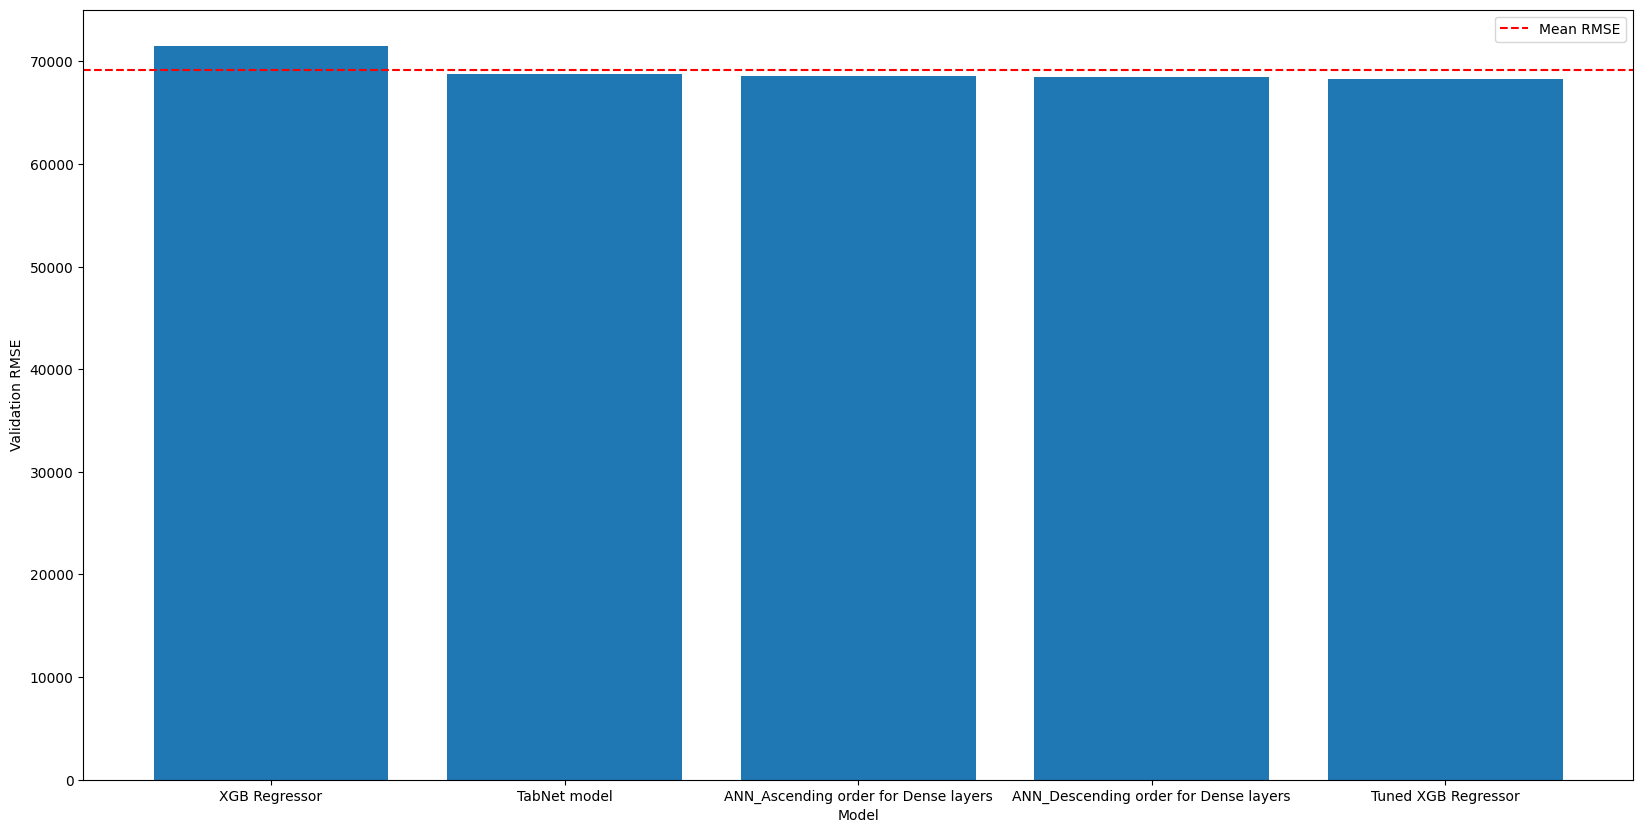

In [156]:
plt.figure(figsize=(20,10))
plt.bar(x=model_comprison_df['Model_name'],
       height=model_comprison_df['Valid RMSE'].values)
plt.xlabel('Model')
plt.ylabel('Validation RMSE')
plt.axhline(y=means_rmse,
           color='red',
           linestyle='--',
           label='Mean RMSE')

plt.tight_layout
plt.legend()

In [148]:
# plot feature importance

best_model= rs_XGB_model.best_estimator_

feature_importance=best_model.feature_importances_

feature_importance_df=pd.DataFrame({
    'Feature': X_train_df.columns,
    'Importance': feature_importance
})
feature_importance_df.head().sort_values(by='Importance', ascending= False)

,Feature,Importance
1,fuel_type_E85 Flex Fuel,0.018082
0,fuel_type_Diesel,0.016154
2,fuel_type_Gasoline,0.013093
3,fuel_type_Hybrid,0.012431
4,fuel_type_Plug-In Hybrid,0.000667
